# Exploratory Data Analysis - Calories Burned Prediction

### Tasks: 
1. Data Inspection and Cleaning.
2. Univariate Analysis and Statistics.
3. Multivariate and Bivariate Analysis.
4. Feature Engineering.
5. Summary of Findings


------------------------------------------------------------------------------------------------------------------------------------------------

#### 1. Data Inspection and Cleaning.

* Inspect data head, shape, 
* Check for misssing values, duplicate rows.
* Encode Categorical features.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [5]:
df = pd.read_csv(r'Cals_burnt2\training\calories.csv')

In [6]:
print("First 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

First 5 rows:
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  

Last 5 rows:
        User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526    m

In [7]:
print(f"\nDataset Shape: {df.shape}")


Dataset Shape: (15000, 9)


In [8]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64


In [10]:
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [11]:
df_eda = df.copy()

Encode Gender: male=0, female=1

In [12]:
df_eda['Gender'].replace({'male': 0, 'female': 1}, inplace=True)

In [13]:
print("\nFirst 5 rows after encoding Gender:")
print(df_eda.head())


First 5 rows after encoding Gender:
    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       1   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  


#### 1. Summary

1. No missing missing values or duplicate Rows.
2. Database shape: 15000 rows , 8 input variables , 1 output variable.
3. Encoded Gender feature to Male : 0 , Female : 1

------------------------------------------------------------------------------------------------------------------------------------------------

#### 2. Univariate Analysis and Statistics
* Explore the distribution and basic statistics of each variable individually.


Descriptive Statistics (Numerical Features):
            User_ID        Gender           Age        Height        Weight  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07      0.503533     42.789800    174.465133     74.966867   
std    2.872851e+06      0.500004     16.980264     14.258114     15.035657   
min    1.000116e+07      0.000000     20.000000    123.000000     36.000000   
25%    1.247419e+07      0.000000     28.000000    164.000000     63.000000   
50%    1.499728e+07      1.000000     39.000000    175.000000     74.000000   
75%    1.744928e+07      1.000000     56.000000    185.000000     87.000000   
max    1.999965e+07      1.000000     79.000000    222.000000    132.000000   

           Duration    Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  15000.000000  
mean      15.530600     95.518533     40.025453     89.539533  
std        8.319203      9.583328      0.779230   

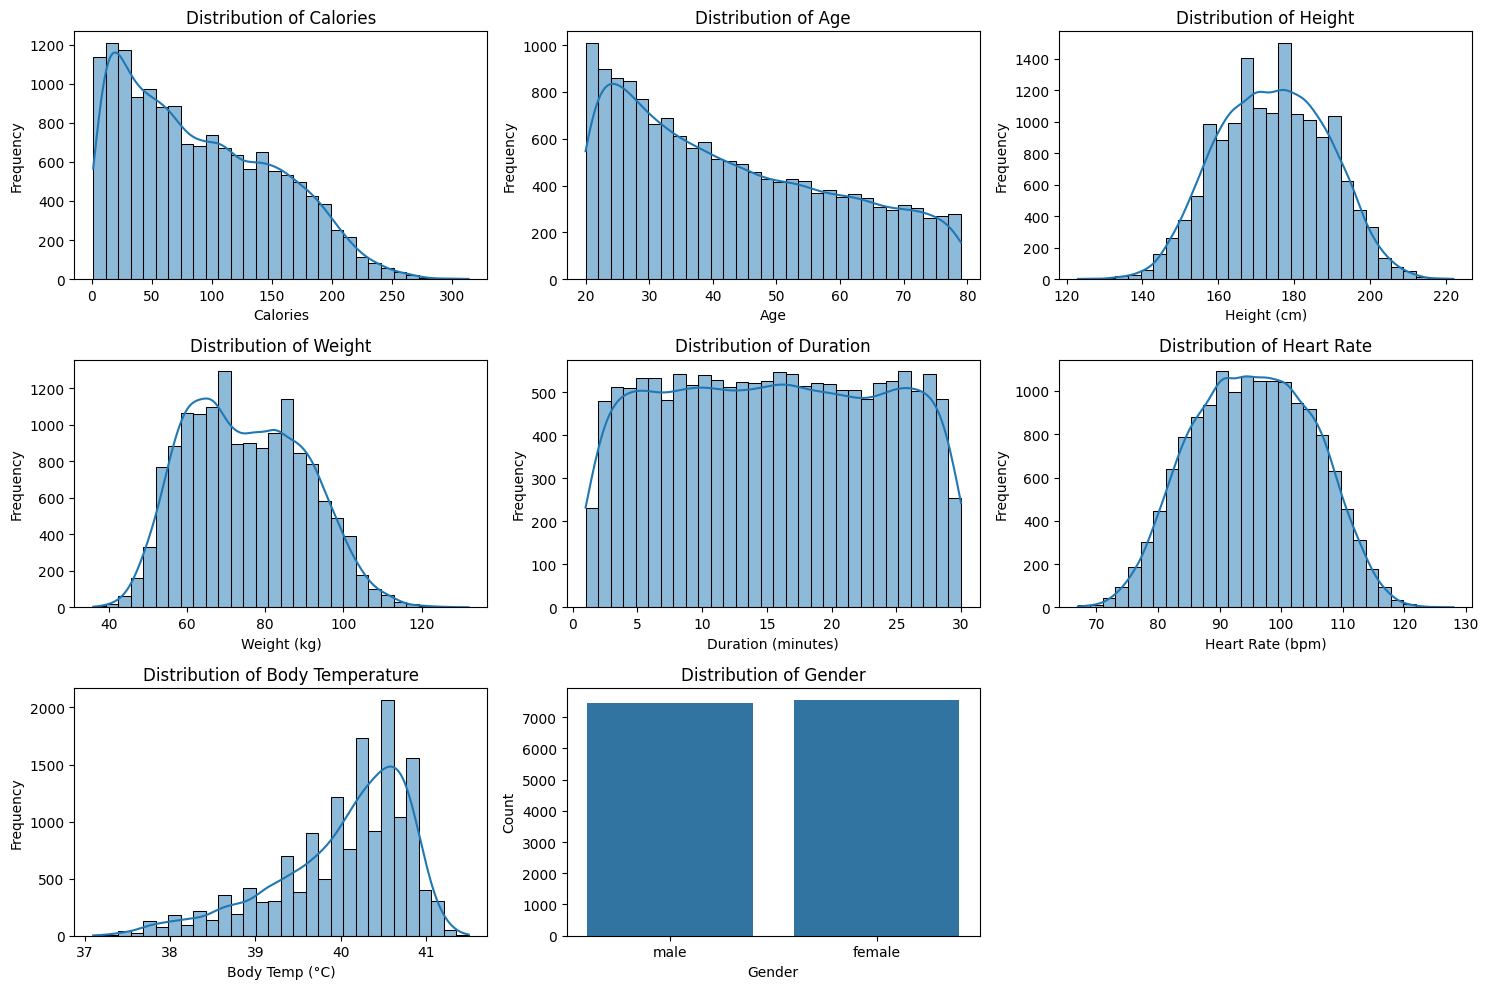

In [14]:
print("\nDescriptive Statistics (Numerical Features):")
print(df_eda.describe())

plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
sns.histplot(df_eda['Calories'], kde=True, bins=30)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')

plt.subplot(3, 3, 2)
sns.histplot(df_eda['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(3, 3, 3)
sns.histplot(df_eda['Height'], kde=True, bins=30)
plt.title('Distribution of Height')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

plt.subplot(3, 3, 4)
sns.histplot(df_eda['Weight'], kde=True, bins=30)
plt.title('Distribution of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

plt.subplot(3, 3, 5)
sns.histplot(df_eda['Duration'], kde=True, bins=30)
plt.title('Distribution of Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

plt.subplot(3, 3, 6)
sns.histplot(df_eda['Heart_Rate'], kde=True, bins=30)
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')

plt.subplot(3, 3, 7)
sns.histplot(df_eda['Body_Temp'], kde=True, bins=30)
plt.title('Distribution of Body Temperature')
plt.xlabel('Body Temp (°C)')
plt.ylabel('Frequency')

plt.subplot(3, 3, 8)
sns.countplot(x=df['Gender'])
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

#### Observations:
1. Calories: The histogram show a right-skewed distribution, with most values clustered at lower calorie counts (e.g., 0-100) and a long tail extending to 314.
2. Age: Age range 20-79 and mean of ~42.8, age distribution also slighty right-skewed.
3. Height: Distributution is approximately normal with a mean ~174.5 cm, and std ~14.3.
4. Weight: Also approximately normal with a mean ~75 kg,and  std ~15.
5. Duration: Durations is evely distributed except for the two extremes of 1 minute and 30 minute workout duration.
6. Heart_Rate: Normal distribution ranging from 67-128 bpm.
7. Body_Temp: Distribution is left-skewed with a mode of 40.025 and a range of 37.1 - 41.5.
8. Gender: Gender is near even split (7553 females, 7447 males), indicating good balance.

#### Summary:
Most numerical features are well-behaved, though Calories, age and body temp exhibit skewness, which may influence modeling choices (e.g., log transformation for linear models, tree based models should be able to handle skewness).
Categorical Gender is balanced, ensuring no bias in representation.

------------------------------------------------------------------------------------------------------------------------------------------------

#### 3. Multivariate and Bivariate Analysis

* Examine relationships between variables, focusing on how they relate to Calories.

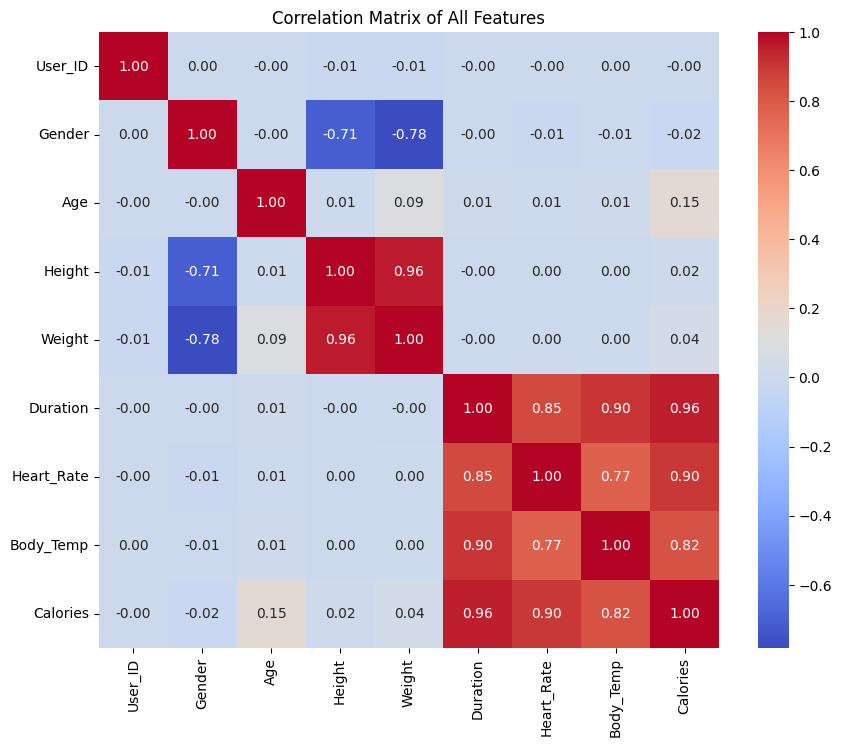

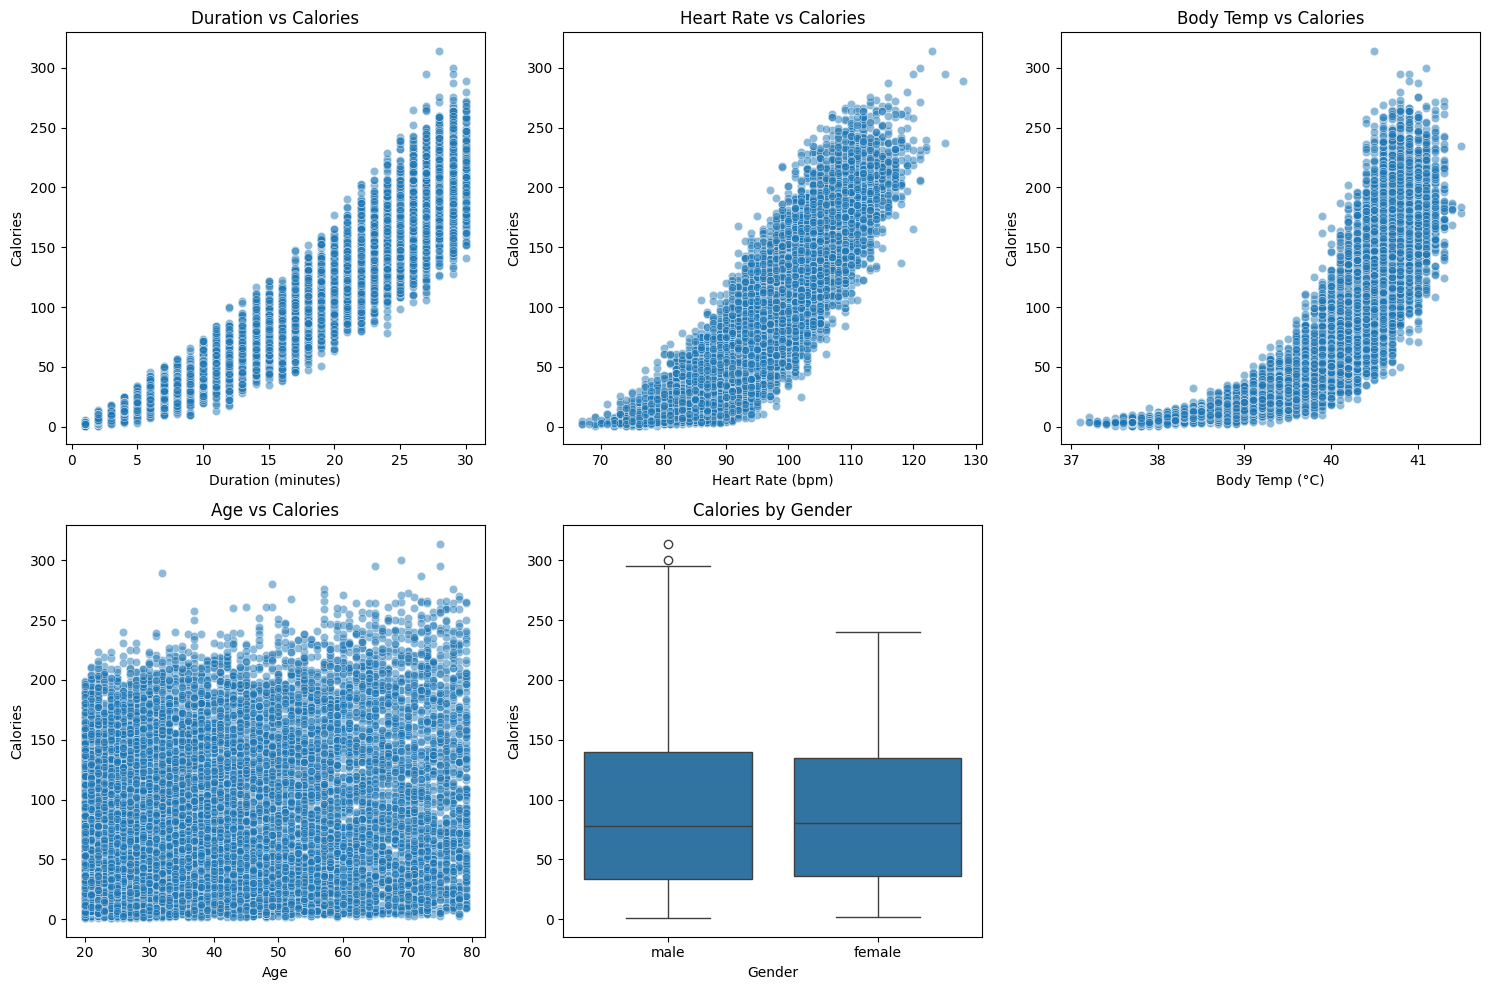

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_eda.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of All Features')
plt.show()

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.scatterplot(x='Duration', y='Calories', data=df_eda, alpha=0.5)
plt.title('Duration vs Calories')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories')

plt.subplot(2, 3, 2)
sns.scatterplot(x='Heart_Rate', y='Calories', data=df_eda, alpha=0.5)
plt.title('Heart Rate vs Calories')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Calories')

plt.subplot(2, 3, 3)
sns.scatterplot(x='Body_Temp', y='Calories', data=df_eda, alpha=0.5)
plt.title('Body Temp vs Calories')
plt.xlabel('Body Temp (°C)')
plt.ylabel('Calories')

plt.subplot(2, 3, 4)
sns.scatterplot(x='Age', y='Calories', data=df_eda, alpha=0.5)
plt.title('Age vs Calories')
plt.xlabel('Age')
plt.ylabel('Calories')

plt.subplot(2, 3, 5)
sns.boxplot(x='Gender', y='Calories', data=df) 
plt.title('Calories by Gender')
plt.xlabel('Gender')
plt.ylabel('Calories')

plt.tight_layout()
plt.show()

#### Observations:
1. Correlation with Calories:
* Duration: 0.96 (very strong positive)
* Heart_Rate: 0.90 (strong positive)
* Body_Temp: 0.82 (strong positive)
* Age: 0.15 (weak positive)
* Weight: 0.04 (very weak positive)
* Height: 0.02 (very weak positive)
* Gender: -0.02 (very weak negative)

2. Inter-Feature Correlations:
* Height and Weight: 0.96 correlations indicating high collinearity.
* Durations, Heart_Rate, and body_Temp: All share strong positive corelation, idicating high collinearity.
* Gender vs height and weights: Strong negative correlation showing men are typically taller and heavier. 

#### Summary
1. Duration,  Heart_Rate and body_Temp show highest correlation to calories burned and therefore strong predictors of calories burned, however also show strong positve signs of collinearity. Collinearity would be a problem for linear models but should be included for tree-based models.
2. Height and weight show strong positive correlation suggesting combining both features into a BMI could be advantagous.
3. Age being the next strongest predictor with a much lower correlation, followed by gender, height and weight. 

------------------------------------------------------------------------

#### 4. Feature Engineering

* Create or modify features to enhance predictive power.

In [33]:
df_eda['BMI'] = df_eda['Weight'] / ((df_eda['Height'] / 100) ** 2)
  
print("\nFirst 5 rows with new feature:")
print(df_eda[['BMI', 'Calories']].head())

print("\nCorrelations with new feature:")
print(df_eda[['BMI', 'Calories']].corr())


First 5 rows with new feature:
         BMI  Calories
0  26.038781     231.0
1  21.773842      66.0
2  24.655910      26.0
3  22.159109      71.0
4  24.456063      35.0

Correlations with new feature:
               BMI  Calories
BMI       1.000000  0.056473
Calories  0.056473  1.000000


#### Observations:
1. BMI: Correlation with calories is still weak at 0.05 but and improvement from 0.02 and 0.04, and should capture interplay between both features.


------------------------------------------------------------------------

## Summary of Findings

1. Data Quality: 
* Clean dataset with no missing or duplicate data.
* Gender encoded male = 0, Female = 1

2. Distribution:
* Calories, age and body_Temp exhibit skewness.
* Height,  weight, duration , heart Rate all normally distributed.
* Gender balanced at roughly 50/50.

3. Corrrelation to Calories:
* Duration, Heart_Rate, and body_temp all strong positive.
* Weight,  Height, Age, Gender all weak correlation.

4. Feature Relationship:
* Heart_Rate, Duration, Body_Temp all share high correlation, collinearity.
* Height and Weight, show high collinearity.

5. Model Considerations:
* Use Duration, Heart_Rate, and body_Temp as primary predictors and test inclusion of BMI, Age and Gender.
* Consider either performing log transformations on skeded features for linear models or just use tree based models.